<a href="https://colab.research.google.com/github/nikibhatt/DS-Unit-1-Sprint-2-Statistics/blob/master/Hypothesis_Testing_%26_Confidence_Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

In [0]:
# Randomly generate a coin
# that may or may not be fair
chances = np.random.uniform(0, 1)
chances

0.8082985230398018

In [0]:
# Flip the coin ten times;
# this becomes our sample
flips = np.random.binomial(1, chances, 10)
flips

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# Is the coin fair?

**Null Hypothesis**: The coin is fair.

**Alternative Hypothesis**: The coin favors one side over the other.

How do we test the null hypothesis?

## Approach 1: T-Statistic & P-Value

The t-statistic tells us (in terms of standard deviations from the corresponding t-distribution's mean) how unlikely our given mean is, assuming the sample standard deviation is a good estimate of the population standard deviation. Its equation:

> $ t_\alpha = \displaystyle \frac{\bar x - \mu}{s / \sqrt n} $

What do the variables mean?

> $ \alpha = $ Significance level; "How unlikely must it be for us to reject the null hypothesis?" In our case, $ 0.05 $
>
> $ t_\alpha = $ Corresponding t-statistic for that signifiance level; "How many standard deviations away must the t-statistic be, in order to reach that level of significance?"
>

The other side of the equation tells us how to construct the required $ t_\alpha $:

>
> $ \bar x = $ Sample mean
>
> $ \mu = $ Population mean; in our case, hypothesized to be $ 0.5 $
>
> $ s = $ Sample standard deviation
>
> $ n = $ Sample size
>
> $ s / \sqrt n = $ Standard error; "How far from our sample mean would we have to go to get 66% confidence that the population mean is within that distance?" Approximated, because we don't know the population standard deviation (we use the sample's instead)

With the necessary $ t_\alpha $, we use a CDF lookup to turn that into the probability of getting, at most, that t-statistic; the p-value is simply $ 1 - CDF(t_\alpha) $ ("How likely are we to get results at least as extreme as this?")

In [0]:
# Null Hypothesis
mu = 0.5

n = len(flips)
xbar = flips.mean()
s = flips.std()

stderr = s / math.sqrt(n)
t = (xbar - mu) / stderr

# How likely are we to get a t-statistic
# at least this high, assuming the null hypothesis?
dof = n - 1
p = 1 - stats.t.cdf(abs(t), dof)

# Can we reject the null hypothesis?
approach1 = p < 0.05
approach1

False

## Approach 2: Confidence Intervals

We can come at it "backwards" as well. Assuming the null hypothesis is true, what are (according to a t-distribution) the lower and upper bounds for 95% of the means we would draw for an arbitrary sample?

If the mean of *our* sample falls outside these bounds (centered on $ 0.5 $), then we can reject the null hypothesis.

In [0]:
# According to the t-distribution,
# where are the 2.5% and 97.5% bounds of means,
# assuming the null hypothesis (that our coin is fair)?
bare_std = stats.t.ppf(0.975, dof)

# Translate this multiplier of standard deviations
# into our own sample unit of standard deviation
margin = stderr * bare_std
lower = mu - margin
upper = mu + margin

# Does our sample mean fall outside this boundary?
approach2 = xbar < lower or xbar > upper
approach2

False

## THE PAYOFF

Our two approaches, hypothesis testing and confidence intervals, should agree on whether we can reject the null hypothesis:

In [0]:
assert(approach1 == approach2)

if approach1:
  print("REJECT THE NULL HYPOTHESIS\nALTERNATIVE HYPOTHESIS IS STATISTICALLY SIGNIFICANT\n---\nBIASED COIN")
else:
  print("FAILED TO REJECT THE NULL HYPOTHESIS\nALTERNATIVE HYPOTHESIS IS NOT STATISTICALLY SIGNIFICANT\n---\nFAIR COIN")

FAILED TO REJECT THE NULL HYPOTHESIS
ALTERNATIVE HYPOTHESIS IS NOT STATISTICALLY SIGNIFICANT
---
FAIR COIN


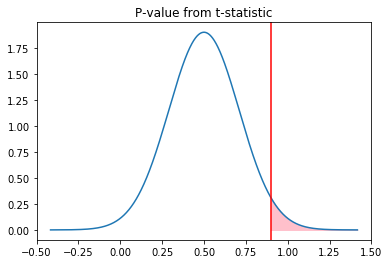

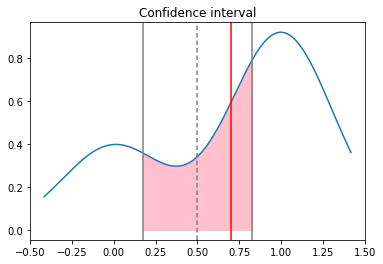

In [0]:
# Graph the p-value
x = np.linspace(mu - 2 * s, mu + 2 * s, 1000)
Y = stats.norm.pdf(x, mu, s ** 2)
plt.plot(x, Y)
plt.axvline(1 - p, color='red')
plt.fill_between(x, 0, Y, where=x>=1-p, color='pink')
plt.title('P-value from t-statistic')
plt.xlim(-0.5, 1.5)
plt.show()

print('\n\n')

# Graph the confidence interval
d = stats.gaussian_kde(flips)
x = np.linspace(mu - 2 * s, mu + 2 * s,1000)
plt.plot(x, d(x))
plt.axvline(mu, color='grey', dashes=(3,2))
plt.axvline(lower, color='grey')
plt.axvline(upper, color='grey')
plt.fill_between(x, 0, d(x), where=(x>=lower) & (x<=upper), color='pink')
plt.axvline(xbar, color='red')
plt.title('Confidence interval')
plt.xlim(-0.5,1.5)
plt.show()